<a href="https://colab.research.google.com/github/nurfnick/Cantrell_Jackson/blob/master/SoftwareUsed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pa
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from google.colab import files
import plotly.graph_objects as go
import math
from io import BytesIO
from zipfile import ZipFile
from urllib.request import urlopen
import plotly.express as px
from datetime import datetime
from scipy import stats

In [0]:
url = 'https://raw.githubusercontent.com/nurfnick/Cantrell_Jackson/master/Support-Oct18-Sept19.csv'
url2 = 'https://raw.githubusercontent.com/nurfnick/Cantrell_Jackson/master/HS_Invoiced_Customer_Total.csv'
url3 = 'https://raw.githubusercontent.com/nurfnick/Cantrell_Jackson/master/Invoice_totals_month.csv'
ourl = 'https://raw.githubusercontent.com/nurfnick/Cantrell_Jackson/master/wti-crude-oil-prices-2018-2020.csv'

In [0]:
df1 = pa.read_csv(url)
df2 = pa.read_csv(url2)
df3 = pa.read_csv(url3)

In [4]:
custs = sorted(list(set(df1['HS Customer'].values.tolist())))
calist = []
for c in range(len(custs)):
  calist.append(len(df1[df1['HS Customer']== custs[c]]))

print(calist)


[3, 13, 12, 19, 5, 121, 10, 14, 6, 1, 7, 15, 10, 13, 3, 11, 1, 1, 13, 6]


In [0]:
tolcusts = sorted(list(set(df2['hs_customer_id'].values.tolist())))
totals = df2['Total '].values.tolist()
tlist = []
tc = 0

for c in range(len(custs)):
  if custs[c] in tolcusts:
    tlist.append(totals[tc])
  else:
    tc = tc - 1
    tlist.append('NA')
  tc = tc + 1

ntlist = []
for t in range(len(tlist)):
  if tlist[t] == 'NA':
    nt = 0
    ntlist.append(nt)
  else:
    nt = int(tlist[t])
    ntlist.append(nt)

In [6]:
print(custs)

[4, 5, 10, 15, 16, 18, 19, 20, 21, 23, 24, 25, 26, 28, 34, 37, 39, 40, 41, 45]


In [7]:
fig = go.Figure(data=[go.Table(header=dict(values=['Customer', 'Calls', 'Total']),
                 cells=dict(values=[custs, calist, tlist]))])

fig.show()

In [8]:
fig = px.scatter(x=custs, y=tlist, log_y=True, hover_data=[custs], labels={'x':'Customer', 'y':'Invoice Totals'})

fig.show()

In [9]:
fig = px.scatter(x=calist, y=tlist, log_x=True, log_y=True, hover_data=[custs], labels={'x':'Number of Support Tickets', 'y':'Invoice Totals'})

# Change the bar mode
#fig.update_layout(barmode='group')
fig.show()

In [10]:
averages = []
for c in range(len(custs)):
  if tlist[c] == 'NA':
    a = 0
  else:
    a = int(tlist[c]) / int(calist[c])
    a = round(a, 2)
  averages.append(a)

fig = go.Figure(data=[
    go.Bar(name='Calls', x=custs, y=averages),
])

fig.show()

In [11]:
cn = [4, 5, 10, 15, 16, 18, 19, 20, 21, 23, 24, 25, 26, 28, 34, 37, 39, 40, 41, 45]
lcn = [5, 16, 18, 19]
ncn= [20, 21, 24, 25, 26, 40]
lcnurls = ['https://github.com/nurfnick/Cantrell_Jackson/raw/master/hs_customer_5.zip', 'https://github.com/nurfnick/Cantrell_Jackson/raw/master/hs_customer_16.zip', 'https://github.com/nurfnick/Cantrell_Jackson/raw/master/hs_customer_18.zip', 'https://github.com/nurfnick/Cantrell_Jackson/raw/master/hs_customer_19.zip']
names = ['hs_customer_5.csv', 'hs_customer_16.csv', 'hs_customer_18.csv', 'hs_customer_19.csv']
rdates = []
num = []
u = 0
for n in range(len(cn)):
  if cn[n] in ncn:
    rdates.append('NA')
    num.append('NA')
    continue
  elif cn[n] in lcn:
    url3 = urlopen(lcnurls[u])
    zipfile = ZipFile(BytesIO(url3.read()))
    dft = pa.read_csv(zipfile.open(names[u]), dtype=object)
    u = u + 1
  else:
    urlt = 'https://raw.githubusercontent.com/nurfnick/Cantrell_Jackson/master/hs_customer_'+str(cn[n])+'.csv'
    dft = pa.read_csv(urlt)

  times = []
  #if cn[n] == 23:
  for c in range(dft.shape[0]):
    test = dft['ticket_date'].iloc[c]
    if type(test) == str:
      times.append(int(test))
    elif np.isnan(test) == True:
      continue
    else:
      times.append(int(test))

  dates = []

  for t in range(len(times)):
    if type(times[t]) == str:
      ts = int(times[t])
    else:
      ts = times[t] 
    d = str(datetime.fromtimestamp(ts))
    if d.split('-')[0] == '2018':
      m = d.split('-')[1]+'/'+d.split('-')[0]
      if m not in dates:
        if d.split('-')[1] == '07' or d.split('-')[1] == '08' or d.split('-')[1] == '09':
          continue
        else:
          dates.append(m)
          if dates not in rdates:
            rdates.append(dates)
    else:
      m = d.split('-')[1]+'/'+d.split('-')[0]
      if m not in dates:
        if d.split('-')[1] == '10' or d.split('-')[1] == '11' or d.split('-')[1] == '12':
          continue
        else:
          dates.append(m)
          if dates not in rdates:
            rdates.append(dates)

  num.append(len(dates))
  print(str(cn[n])+':'+str(dates))
  print('Total Months:'+str(len(dates)))


print(rdates)
print(num)

4:['10/2018', '11/2018', '12/2018', '01/2019']
Total Months:4
5:['10/2018', '11/2018', '12/2018', '01/2019', '02/2019', '03/2019', '04/2019', '05/2019', '06/2019', '07/2019', '08/2019', '09/2019']
Total Months:12
10:['10/2018', '11/2018', '12/2018', '01/2019', '02/2019', '03/2019', '04/2019', '05/2019', '06/2019', '07/2019', '08/2019', '09/2019']
Total Months:12
15:['10/2018', '11/2018', '12/2018', '01/2019', '02/2019', '03/2019', '04/2019', '05/2019', '06/2019', '07/2019', '08/2019', '09/2019']
Total Months:12
16:['10/2018', '11/2018', '12/2018', '01/2019', '02/2019', '03/2019', '04/2019', '05/2019', '06/2019', '07/2019', '08/2019', '09/2019']
Total Months:12
18:['04/2019', '03/2019', '01/2019', '02/2019', '12/2018', '06/2019', '05/2019', '11/2018', '08/2019', '07/2019', '10/2018', '09/2019']
Total Months:12
19:['04/2019', '03/2019', '02/2019', '10/2018', '12/2018', '01/2019', '11/2018', '08/2019', '09/2019', '07/2019', '06/2019', '05/2019']
Total Months:12
23:['04/2019', '03/2019', '

In [49]:
swmonths = []

for m in range(9):
  print(m)
  n = 0
  for r in range(len(rdates)):
    for d in range(len(rdates[r])):
      if '0'+str(m+1) == rdates[r][d].split('/')[0]:
        n = n + 1
  swmonths.append(n)

for m in range(9,12):
  print(m)
  n = 0
  for r in range(len(rdates)):
    for d in range(len(rdates[r])):
      if str(m+1) == rdates[r][d].split('/')[0]:
        n = n + 1
  swmonths.append(n)

print(swmonths)

0
1
2
3
4
5
6
7
8
9
10
11
[10, 10, 10, 11, 12, 12, 12, 13, 13, 9, 10, 10]


In [12]:
dfo = pa.read_csv(ourl)

months = ['10', '11', '12', '1', '2', '3', '4', '5', '6', '7', '8', '9']
jdates = []
dates = dfo['date'].values.tolist()
for d in range(len(dates)):
  if isinstance(dates[d], str):
    jdates.append(dates[d])

jprices = []
prices = dfo[' value'].values.tolist()
for p in range(len(prices)):
  if math.isnan(prices[p]) == False:
    jprices.append(prices[p])

opm = []
for m in range(len(months)):
  total = 0
  num = 0
  for d in range(len(jdates)):
    if months[m] in months[0:3]:
      if jdates[d].split('/')[0] == months[m] and jdates[d].split('/')[2] == '2018':
        total = total + jprices[d]
        num = num + 1
    else:
      if jdates[d].split('/')[0] == months[m] and jdates[d].split('/')[2] == '2019':
        total = total + jprices[d]
        num = num + 1
  opm.append(float(round(total/num, 2)))

print(opm)

[70.77, 56.72, 49.04, 51.58, 55.01, 58.2, 63.87, 60.88, 54.74, 57.55, 54.83, 56.97]


In [0]:
#months = ['Oct 18', 'Nov 18', 'Dec 18', 'Jan 19', 'Feb 19', 'Mar 19', 'Apr 19', 'May 19', 'Jun 19', 'Jul 19', 'Aug 19', 'Sep 19']
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [64]:
fig = px.scatter(x=swmonths, y=opm, hover_data=[months], labels={'x':'Number Customers Who Used Software Per Month', 'y':'Oil Price Per Month'})

fig.show()

In [0]:
m = stats.linregress(swmonths,opm)[0]
b = stats.linregress(swmonths,opm)[1]
#stats.linregress()
def y(x):
    return(m*x+b)

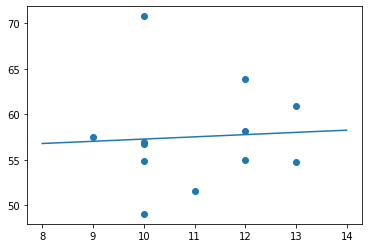

In [62]:
x = np.arange(8,14,0.01)
plt.scatter(swmonths,opm)
plt.plot(x,y(x))

In [0]:
fig = px.scatter(x=num, y=tlist, log_y=True, hover_data=[custs], labels={'x':'Total Months Used', 'y':'Invoice Totals'})

fig.show()

In [0]:
print(num)
print(tlist)

['4' '12' '12' '12' '12' '12' '12' 'NA' 'NA' '12' 'NA' 'NA' 'NA' '12' '11'
 '8' '6' 'NA' '5' '2']
['16500' '39000' '18000' '7200' '18000' '117000' '30000' '30000' 'NA'
 '15000' '18000' 'NA' '18000' '9000' '13250' '43600' '11300' '3750'
 '17875' '10800']


In [0]:
m = stats.linregress(nnum,ntlist)[0]
b = stats.linregress(nnum,ntlist)[1]
#stats.linregress()
def y(x):
    return(m*x+b)

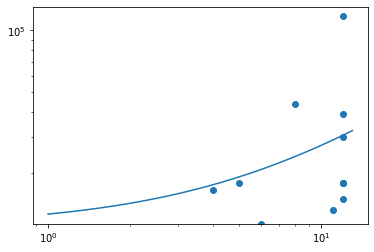

In [0]:
x = np.arange(1,13,0.01)
plt.scatter(nnum,ntlist)
plt.xscale('log')
plt.yscale('log')
plt.plot(x,y(x))

In [0]:
ourl = 'https://raw.githubusercontent.com/nurfnick/Cantrell_Jackson/master/wti-crude-oil-prices-2018-2020.csv'
mturl = 'https://raw.githubusercontent.com/nurfnick/Cantrell_Jackson/master/Invoice_totals_month.csv'

dfo = pa.read_csv(ourl)

months = ['10', '11', '12', '1', '2', '3', '4', '5', '6', '7', '8', '9']
jdates = []
dates = dfo['date'].values.tolist()
for d in range(len(dates)):
  if isinstance(dates[d], str):
    jdates.append(dates[d])

jprices = []
prices = dfo[' value'].values.tolist()
for p in range(len(prices)):
  if math.isnan(prices[p]) == False:
    jprices.append(prices[p])

opm = []
for m in range(len(months)):
  total = 0
  num = 0
  for d in range(len(jdates)):
    if months[m] in months[0:3]:
      if jdates[d].split('/')[0] == months[m] and jdates[d].split('/')[2] == '2018':
        total = total + jprices[d]
        num = num + 1
    else:
      if jdates[d].split('/')[0] == months[m] and jdates[d].split('/')[2] == '2019':
        total = total + jprices[d]
        num = num + 1
  opm.append(float(round(total/num, 2)))

print(opm)

In [0]:
cn = [4, 5, 10, 15, 16, 18, 19, 20, 21, 23, 24, 25, 26, 28, 34, 37, 39, 40, 41, 45]
lcn = [5, 16, 18, 19]
ncn= [20, 21, 24, 26, 40, 25]
lcnurls = ['https://github.com/nurfnick/Cantrell_Jackson/raw/master/hs_customer_5.zip', 'https://github.com/nurfnick/Cantrell_Jackson/raw/master/hs_customer_16.zip', 'https://github.com/nurfnick/Cantrell_Jackson/raw/master/hs_customer_18.zip', 'https://github.com/nurfnick/Cantrell_Jackson/raw/master/hs_customer_19.zip']
names = ['hs_customer_5.csv', 'hs_customer_16.csv', 'hs_customer_18.csv', 'hs_customer_19.csv']
rtlist = []
u = 0
for n in range(len(cn)):
  if cn[n] in ncn:
    rtlist.append('NA')
    continue
  elif cn[n] in lcn:
    url3 = urlopen(lcnurls[u])
    zipfile = ZipFile(BytesIO(url3.read()))
    df3 = pa.read_csv(zipfile.open(names[u]), dtype=object)
    u = u + 1
  else:
    url3 = 'https://raw.githubusercontent.com/nurfnick/Cantrell_Jackson/master/hs_customer_'+str(cn[n])+'.csv'
    df3 = pa.read_csv(url3)

  invoiceid = set(df3['invoice_id'].values.tolist())
  visited = []
  invoices = df3['invoice_total'].values.tolist()
  r = 0

  total = 0
  did = []
  didnt = []

  for row in df3['invoice_id']:
    if str(row) not in visited:
      did.append(1)
      visited.append(str(row))
      if isinstance(invoices[r], str) == True:
        i = float(invoices[r])
      else:
        i = invoices[r]
      if math.isnan(i) == True:
        total = total + 0
      else:
        total = total + i
      r = r + 1
    else:
      didnt.append(1) 
      r = r + 1

  rtlist.append(round(total, 2))
  print('Customer '+str(cn[n])+' invoice total: '+str(round(total, 2)))

print(rtlist)

In [0]:
rntlist = []
for t in range(len(rtlist)):
  if rtlist[t] == 'NA':
    nt = 0
    rntlist.append(nt)
  else:
    nt = rtlist[t]
    rntlist.append(nt)

fig = go.Figure(data=[
    go.Bar(name='Customer Invoice from CJ (in k)', x=custs, y=ntlist),
    go.Bar(name='Cumtomer Invoice totals (in 1,000k)', x=custs, y=rtlist)
])

# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

In [0]:
print(len(rntlist))
print(len(ntlist))

In [0]:
fig = px.scatter(x=rntlist, y=ntlist, log_x = True, log_y=True, hover_data=[custs], labels={'x':'Customer Personal Invoice Total', 'y':'Customer Invoice Total from CJ'})

fig.show()

In [0]:
# Create data
x = calist
y = ntlist

# Plot
plt.scatter(x, y)
plt.title('Customer Invoiced from CJ v Customer')
plt.xlabel('Calls')
plt.ylabel('Invoice totals')
plt.xscale('log')
plt.show()